## Import Data ##

In [484]:
import pandas as pd
import numpy as np
from scipy.stats import *

data = pd.read_excel("diabetes new.xlsx")
df = round(data)

In [486]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [488]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
df["HighvsLow"] = le.fit_transform(df["HighvsLow"])

In [490]:
df = df.drop(columns=["DiabetesPedigreeFunction"])

In [492]:
X = df.drop(columns=["HighvsLow"])
y = df["HighvsLow"]

In [494]:
df

,Age,Pregnancies,Glucose,BloodPressure (mg/dL),SkinThickness,Insulin,BMI,HighvsLow
0,50,6,148,72,35,0,34.0,0
1,31,1,85,66,29,0,27.0,0
2,32,8,183,64,0,0,23.0,0
3,21,1,1,66,23,94,28.0,1
4,33,0,137,40,35,168,43.0,1
...,...,...,...,...,...,...,...,...
763,63,10,101,76,48,180,33.0,1
764,27,2,122,70,27,0,37.0,1
765,30,5,121,72,23,112,26.0,1
766,47,1,126,60,0,0,30.0,0


## Data Clean Up ##

In [496]:
#Drop outliers
z = np.abs(stats.zscore(df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
df = df.drop(outliers)
df = df.reset_index(drop=True)
df.shape

(694, 8)

In [337]:
df.isna().sum()

Age                      0
Pregnancies              0
Glucose                  0
BloodPressure (mg/dL)    0
SkinThickness            0
Insulin                  0
BMI                      0
HighvsLow                0
dtype: int64

In [ ]:
df = df.dropna() #drop rows with missing values
df = df.reset_index(drop=True)

In [339]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates() #drop duplicate rows
df = df.reset_index(drop=True)

In [463]:
from sklearn.preprocessing import StandardScaler

#Standardize data, helpful for linear regression and Neural Networks
object = StandardScaler()
df = pd.DataFrame(object.fit_transform(X))

In [498]:
X = df.drop(columns=["HighvsLow"])
y = df["HighvsLow"]
df

,Age,Pregnancies,Glucose,BloodPressure (mg/dL),SkinThickness,Insulin,BMI,HighvsLow
0,50,6,148,72,35,0,34.0,0
1,31,1,85,66,29,0,27.0,0
2,32,8,183,64,0,0,23.0,0
3,33,0,137,40,35,168,43.0,1
4,30,5,116,74,0,0,26.0,1
...,...,...,...,...,...,...,...,...
689,63,10,101,76,48,180,33.0,1
690,27,2,122,70,27,0,37.0,1
691,30,5,121,72,23,112,26.0,1
692,47,1,126,60,0,0,30.0,0


## Data Analysis ##

In [343]:
df.corr()

,Age,Pregnancies,Glucose,BloodPressure (mg/dL),SkinThickness,Insulin,BMI,HighvsLow
Age,1.000000,0.568067,0.264247,0.354206,-0.152610,-0.083825,0.060696,0.056408
Pregnancies,0.568067,1.000000,0.149503,0.232271,-0.098512,-0.081567,0.036477,0.045648
Glucose,0.264247,0.149503,1.000000,0.236322,0.011199,0.268577,0.202726,-0.030558
BloodPressure (mg/dL),0.354206,0.232271,0.236322,1.000000,-0.001309,-0.078836,0.264493,0.075906
SkinThickness,-0.152610,-0.098512,0.011199,-0.001309,1.000000,0.460906,0.380413,-0.126536
Insulin,-0.083825,-0.081567,0.268577,-0.078836,0.460906,1.000000,0.162131,-0.176820
BMI,0.060696,0.036477,0.202726,0.264493,0.380413,0.162131,1.000000,-0.065855
HighvsLow,0.056408,0.045648,-0.030558,0.075906,-0.126536,-0.176820,-0.065855,1.000000


In [345]:
df.describe()

,Age,Pregnancies,Glucose,BloodPressure (mg/dL),SkinThickness,Insulin,BMI,HighvsLow
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,33.103746,3.831412,120.396254,72.268012,20.804035,72.548991,32.219020,0.567723
std,11.410264,3.279055,30.016206,12.363083,15.384413,90.297135,6.642891,0.495750
min,21.000000,0.000000,44.000000,24.000000,0.000000,0.000000,18.000000,0.000000
25%,24.000000,1.000000,99.000000,64.000000,0.000000,0.000000,27.000000,0.000000
50%,29.000000,3.000000,115.000000,72.000000,23.000000,42.500000,32.000000,1.000000
75%,40.000000,6.000000,139.000000,80.000000,32.000000,126.000000,36.000000,1.000000
max,68.000000,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.000000


In [347]:
kstest(X, "norm").pvalue #p-value for each row
#kstest(df[""], "norm").pvalue #p-value for each column

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.80320026e-180, 0.00000000e+000])

In [349]:
stats.zscore(df) #Find outliers

,Age,Pregnancies,Glucose,BloodPressure (mg/dL),SkinThickness,Insulin,BMI,HighvsLow
0,1.481862,0.661822,0.920291,-0.021694,0.923415,-0.804027,0.268296,-1.146008
1,-0.184506,-0.864107,-1.180089,-0.507360,0.533129,-0.804027,-0.786222,-1.146008
2,-0.096803,1.272194,2.087169,-0.669249,-1.353255,-0.804027,-1.388803,-1.146008
3,-0.009099,-1.169293,0.553558,-2.611912,0.923415,1.057839,1.624105,0.872595
4,-0.272210,0.356637,-0.146568,0.140195,-1.353255,-0.804027,-0.936867,0.872595
...,...,...,...,...,...,...,...,...
689,2.622009,1.882566,-0.646659,0.302083,1.769036,1.190830,0.117651,0.872595
690,-0.535321,-0.558921,0.053468,-0.183583,0.403034,-0.804027,0.720233,0.872595
691,-0.272210,0.356637,0.020129,-0.021694,0.142843,0.437217,-0.936867,0.872595
692,1.218751,-0.864107,0.186825,-0.993026,-1.353255,-0.804027,-0.334285,-1.146008


[Text(1, 0, 'Age'),
 Text(2, 0, 'Pregnancies'),
 Text(3, 0, 'Glucose'),
 Text(4, 0, 'BloodPressure (mg/dL)'),
 Text(5, 0, 'SkinThickness'),
 Text(6, 0, 'Insulin'),
 Text(7, 0, 'BMI')]

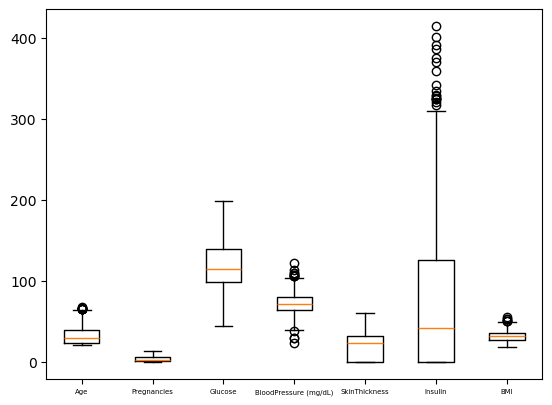

In [371]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=5)

(array([[540., 154.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [694.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  48., 376., 203.,  67.,   0.,   0.,   0.,   0.,   0.],
        [  5., 562., 127.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [644.,  50.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,  88.,  81.,  66.,  52.,  21.,  17.,  14.,   4.,   5.],
        [627.,  67.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  41.5,  83. , 124.5, 166. , 207.5, 249. , 290.5, 332. ,
        373.5, 415. ]),
 <a list of 7 BarContainer objects>)

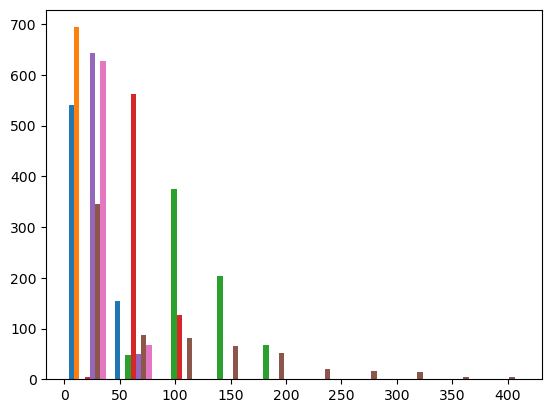

In [385]:
plt.hist(X)

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Pregnancies', ylabel='Age'>,
        <Axes: xlabel='Glucose', ylabel='Age'>,
        <Axes: xlabel='BloodPressure (mg/dL)', ylabel='Age'>,
        <Axes: xlabel='SkinThickness', ylabel='Age'>,
        <Axes: xlabel='Insulin', ylabel='Age'>,
        <Axes: xlabel='BMI', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure (mg/dL)', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>],
       [<Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure (mg/dL)', ylabel='Glucose'>,
        <Axes: x

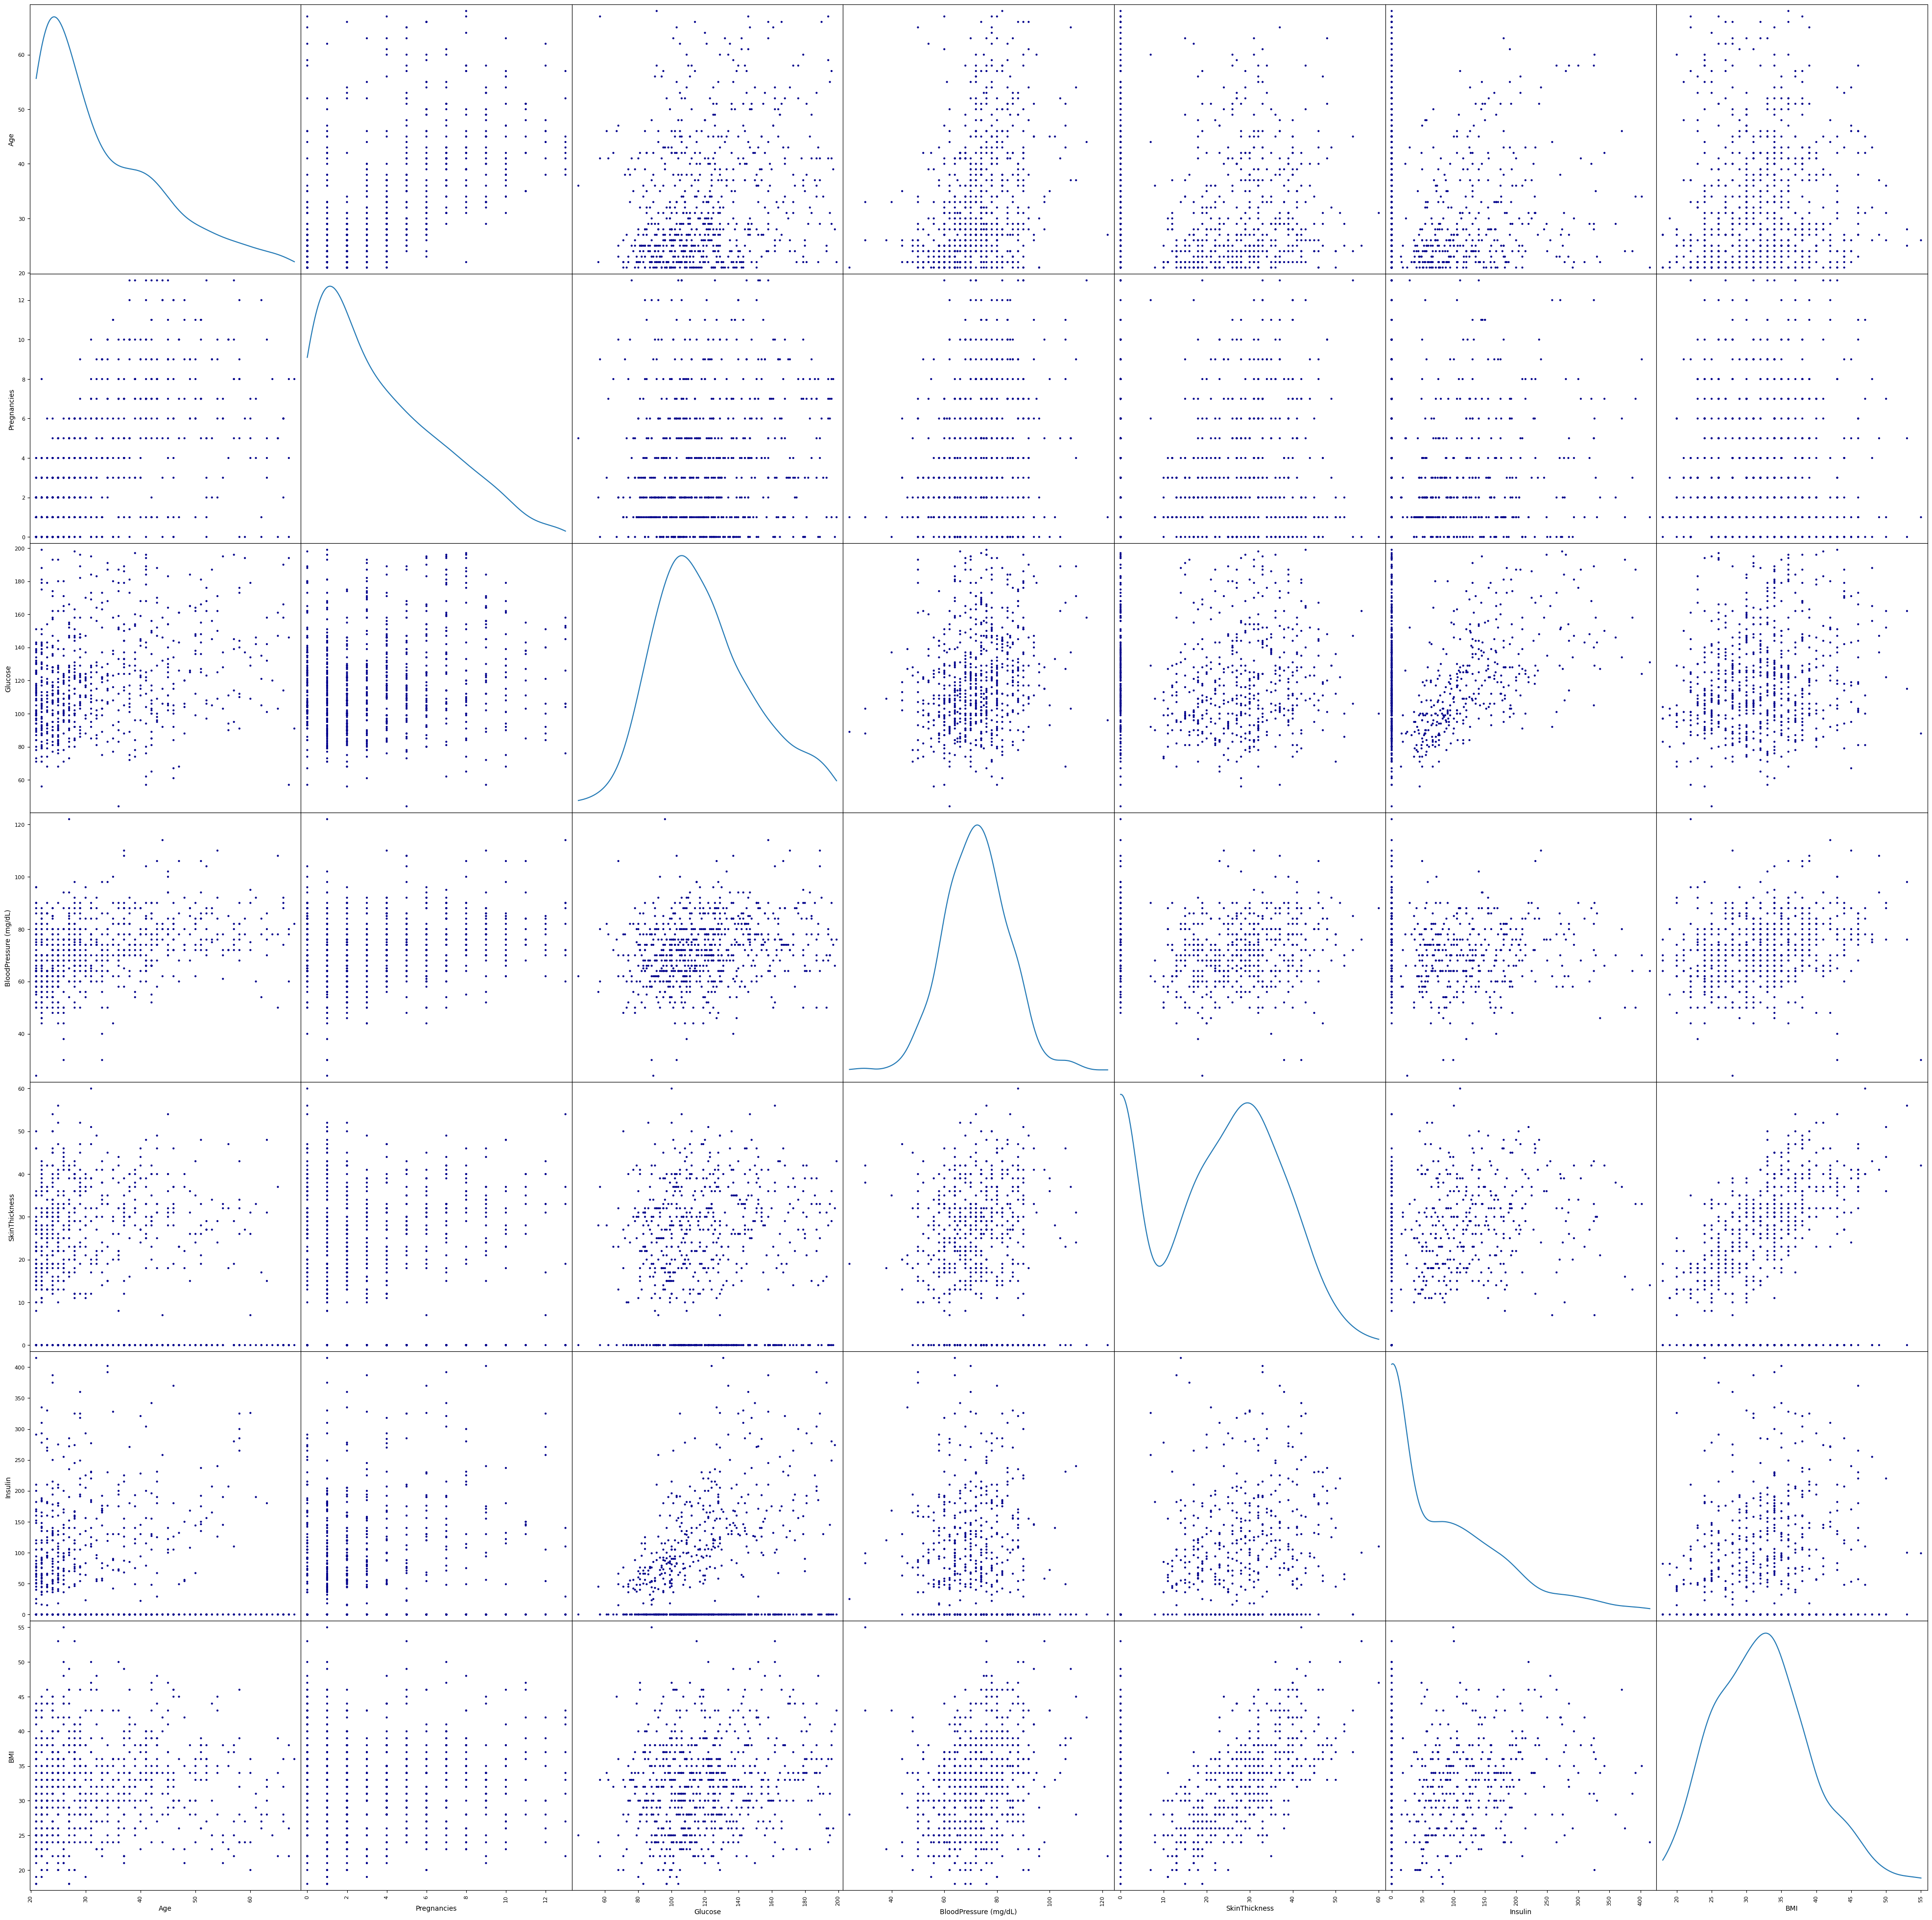

In [500]:
# from pandas.plotting import scatter_matrix

scatter_matrix(X, alpha = 1, figsize = (50, 50), diagonal = "kde", c="#00008B")

## Fine-Tuning ##

In [502]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [367]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = RandomForestRegressor(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=2
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=1,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.2535   | 8.923     | 14.69     | 2.002     |
| 2         | -0.251    | 6.744     | 3.788     | 3.662     |
| 3         | -0.2514   | 4.539     | 7.566     | 9.142     |
| 4         | -0.2588   | 11.24     | 8.965     | 14.33     |
| 5         | -0.2525   | 4.885     | 17.68     | 2.493     |
| 6         | -0.2587   | 13.74     | 8.929     | 12.06     |
| 7         | -0.2445   | 1.014     | 8.835     | 2.647     |
| 8         | -0.2445   | 1.172     | 1.225     | 2.003     |
| 9         | -0.2445   | 1.025     | 1.215     | 9.046     |
| 10        | -0.2445   | 1.399     | 1.476     | 19.21     |
| 11        | -0.2443   | 1.11      | 18.02     | 19.88     |
| 12        | -0.2444   | 1.19      | 10.23     | 19.88     |
| 13        | -0.2526   | 17.73     | 19.98     | 19.87     |
| 14        | -0.2443   | 1.16      | 18.46     | 14.42     |
| 15    

In [399]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = DecisionTreeClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=2
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=1,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.4845   | 8.923     | 14.69     | 2.002     |
| 2         | -0.4412   | 6.744     | 3.788     | 3.662     |
| 3         | -0.4206   | 4.539     | 7.566     | 9.142     |
| 4         | -0.4701   | 11.24     | 8.965     | 14.33     |
| 5         | -0.4619   | 4.885     | 17.68     | 2.493     |
| 6         | -0.4701   | 13.74     | 8.929     | 12.06     |
| 7         | -0.4289   | 1.764     | 4.624     | 8.582     |
| 8         | -0.4289   | 1.05      | 10.99     | 10.83     |
| 9         | -0.4289   | 1.211     | 6.146     | 15.88     |
| 10        | -0.4289   | 1.031     | 18.85     | 19.56     |
| 11        | -0.4289   | 1.116     | 11.55     | 19.7      |
| 12        | -0.4928   | 9.064     | 19.69     | 19.91     |
| 13        | -0.466    | 19.79     | 1.038     | 2.201     |
| 14        | -0.4639   | 2.356     | 1.237     | 19.97     |
| 15    

In [536]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=40, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 40 folds for each of 28 candidates, totalling 1120 fits
{'n_neighbors': 20}


## Training and Testing ##

In [512]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

#model1 = RandomForestClassifier(max_depth = 1, min_samples_leaf = 19, min_samples_split = 17).fit(X_train, y_train)
model1 = RandomForestClassifier(n_estimators = 100, random_state=42).fit(X_train, y_train)

predictions = model1.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model1, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.5598086124401914


In [506]:
from sklearn.tree import DecisionTreeClassifier
import joblib

model2 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3, min_samples_split = 8).fit(X_train, y_train)

predictions = model2.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model2, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.5645933014354066


In [538]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

model3 = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)

score = model3.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model3, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.6028708133971292


In [524]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

linreg = LinearRegression()

param_space = {'copy_X': [True,False], 'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}

model4 = GridSearchCV(linreg, param_space, cv=10).fit(X_train, y_train)

predictions = np.array(model4.predict(X_test))
score = model4.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model4, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.030462837996997116


In [540]:
from sklearn import svm
import joblib

model5 = svm.SVC().fit(X_train, y_train)

predictions = model5.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.6:
    joblib.dump(model5, "Diabetes.joblib")
    model = joblib.load("Diabetes.joblib")

Accuracy: 0.6076555023923444


## Predicted vs Actual ##

In [542]:
y_predicted = model.predict(X_test)

In [544]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32, 67],
       [15, 95]])

Text(95.72222222222221, 0.5, 'Actual')

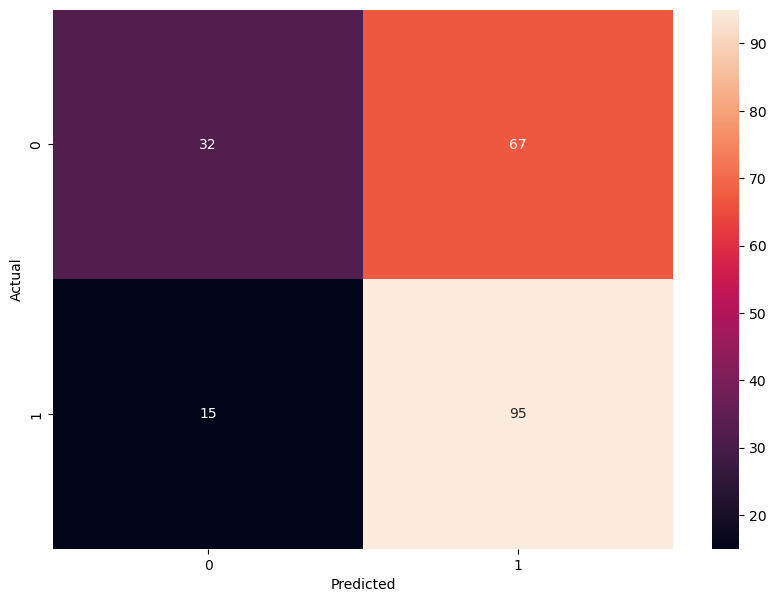

In [546]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")